# Machine Learning from disaster

## Goal: Use passenger data from Titanic to predict who will survive and who will die.



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

%matplotlib inline
sns.set_theme()

# Defining a color scheme
colors = [key for key in mcolors.TABLEAU_COLORS.keys()]


In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Type of each variable:
    
* **Passenger ID**: Passenger ID - Numerical (integer)

* **Survied**: Survival - Categorical (binary)

* **Pclass**: Ticket class - Categorical (integer) $\rightarrow$ *a proxy for socio-economic status*.

* **Name**: Name - (string)

* **Sex**: Sex - Categorical (binary)

* **Age**: Age in years - Numerical (integer)

* **SibSP**: Number of siblings / spouses aboard the Titanic - Numerical (integer)

* **Parch**: Number of parents / childer aboard the Titanic - Numerical (integer)

* **Ticket**: Ticket number - (string)

* **Fare**: Passenger fare - Numerical (float)

* **Cabin**: Cabin Number - (string or NaN)

* **Embarked**: Port of embarkation (Southhampton, Queenstown, Cherbourg)



### Exploratory data analysis

Let us first have a general look at how data are distributed and if there are many NaN entries in our data frame. 

Data set shape

In [21]:
df_train.shape

(891, 12)

Count NaN entries

In [24]:
count_NaN = df_train.isna().sum()
count_NaN

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So both 'Age' and 'Cabin' have a relatively large number of NaN entries. In this first attempt I won't delete those missing data, but in the next attemps I'll check how different approachs of handling missing data affect the performance of the predictive models.

Next let's have a look at the data distribution.

1. Age distribution and statistics

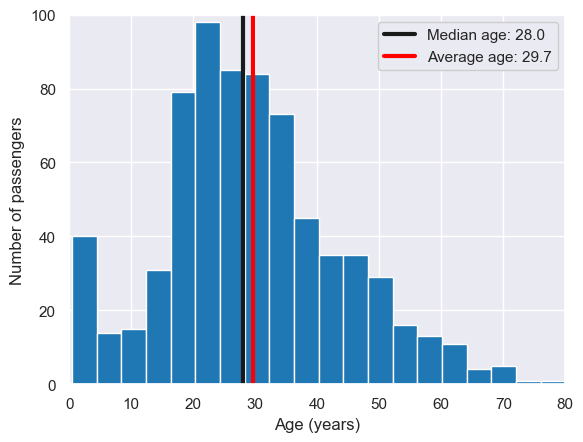

In [199]:
mean = df_train.Age.mean()
median = df_train.Age.median()

plt.hist(df_train.Age, bins=20, color=colors[0])
plt.axvline(x=median, c='k', label = 'Median age: ' + str(np.round(median,1)), lw=3)
plt.axvline(x=mean, c='red', label = 'Average age: ' + str(np.round(mean,1)), lw=3)
plt.xlabel('Age (years)')
plt.ylabel('Number of passengers')
plt.legend(framealpha=1)
plt.ylim(top=100)
plt.xlim([0,80])
plt.show()

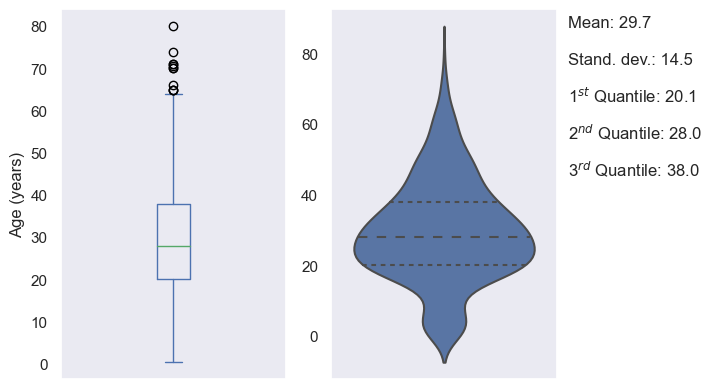

In [203]:
Q1 = df_train['Age'].quantile(0.25)
Q2 = df_train['Age'].quantile(0.50)
Q3 = df_train['Age'].quantile(0.75)
std = np.std(df_train['Age'])

Q1_string = r'1$^{st}$ Quantile: ' + str(np.round(Q1,1))
Q2_string = r'2$^{nd}$ Quantile: ' + str(np.round(Q2,1))
Q3_string = r'3$^{rd}$ Quantile: ' + str(np.round(Q3,1))
mean_string = f'Mean: {str(np.round(mean,1))}'
std_string = f'Stand. dev.: ' + str(np.round(std,1))

fig, (ax1, ax2) = plt.subplots(1,2)

df_train['Age'].plot.box(ax=ax1)
# ax1.set_yticks(range(0, 100, 10), range(0, 100, 10))
ax1.set_xticks([0],[''])
ax1.set_ylabel('Age (years)')
ax1.grid(False)

sns.violinplot(y=df_train['Age'], inner='quartile', ax=ax2)
ax2.text(1.05, 0.95, mean_string, transform=plt.gca().transAxes)
ax2.text(1.05, 0.85, std_string, transform=plt.gca().transAxes)
ax2.text(1.05, 0.75, Q1_string, transform=plt.gca().transAxes)
ax2.text(1.05, 0.65, Q2_string, transform=plt.gca().transAxes)
ax2.text(1.05, 0.55, Q3_string, transform=plt.gca().transAxes)
# ax2.set_yticks(range(0, 100, 10), range(0, 100, 10))
ax2.set_ylabel('')
ax2.grid(False)


plt.show()


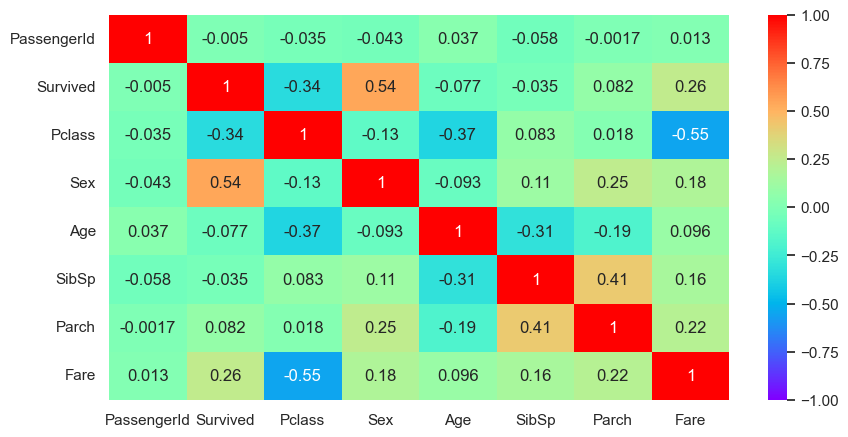

In [217]:
df_train['Sex'] = df_train['Sex'].replace({'male':0, 'female':1})

plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='rainbow')
plt.show()

2. Survival distribution

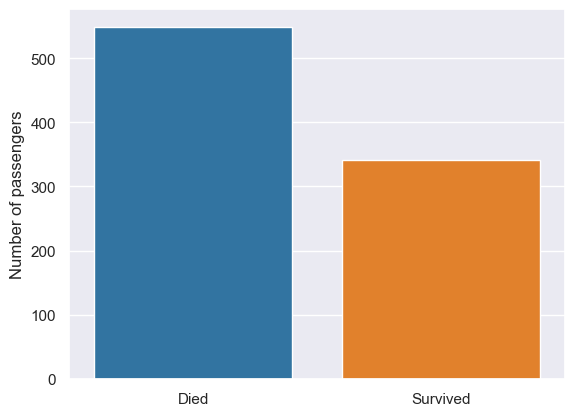

In [72]:
sns.countplot(data=df_train, x='Survived', palette=colors)
plt.xticks([0,1], ['Died', 'Survived'])
plt.ylabel('Number of passengers')
plt.xlabel('')
plt.show()

3. Socio-economic class distribution

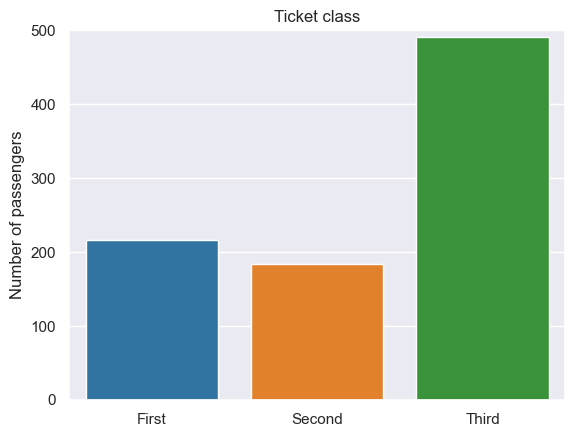

In [90]:
sns.countplot(data=df_train, x='Pclass', palette=colors)
plt.xticks([0,1,2], ['First', 'Second', 'Third'])
plt.xlabel('')
plt.title('Ticket class')
plt.ylabel('Number of passengers')
plt.ylim(top=500)
plt.show()

4. Sex distribution

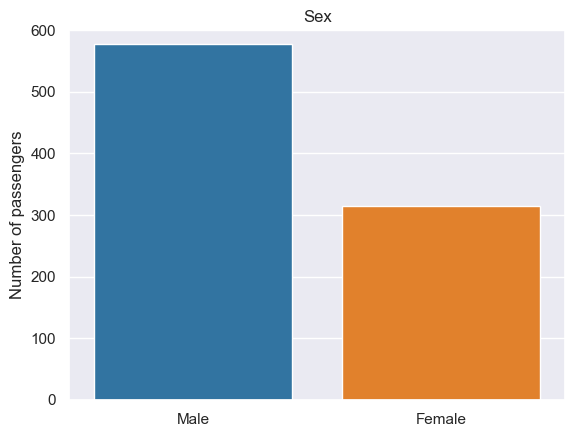

In [89]:
sns.countplot(data=df_train, x='Sex', palette=colors)
plt.xlabel('')
plt.ylabel('Number of passengers')
plt.title('Sex')
plt.xticks([0,1], ['Male', 'Female'])
plt.ylim(top=600)
plt.show()